<a href="https://colab.research.google.com/github/ProgrammerDavid1/Data-Analysis/blob/main/Data%20Analyze%205)%20Data%20Preprocessing%20more%20deeply%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석프로그래밍 11주차 실습

## 실습 시작 전 유의사항

※ 반드시 상단 메뉴에서 '**파일 - 드라이브에 사본 저장**' 진행 후 시작하세요.

## 실습 개요
- 데이터 전처리의 6가지 방법
  - 이상치 처리
  - 누락 데이터 처리
  - 불균형 데이터 처리
  - 스케일링
  - 인코딩
  - 특징 선택

---

In [ ]:
import pandas as pd
import numpy as np

# 와인 품질 데이터셋 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, delimiter=";")   # 세미콜론으로 구분된 데이터셋에 대한 처리, csv = comma seperated values의 약자

wine_df.head()  # 5개까지 추출

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


이 데이터 중 pH 변수에 대해서 이상치를 찾아보고자 합니다.

**"boxplot"**은 이상치를 찾을 때 많이 사용하는 시각화 방법입니다.

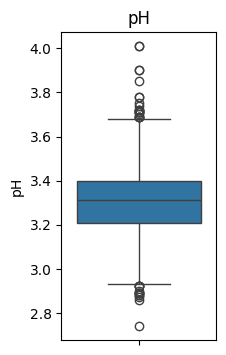

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns   # matplotlib도 가능하지만 좀 더 예쁘게 보기 위해 seaborn을 임포트함

# 이상치를 확인해 볼 column 설정
attribute = 'pH'
column = wine_df[attribute]

fig = plt.figure(figsize=(2, 4))

# 보고자 하는 변수의 데이터를 매개변수로 넣는다.
sns.boxplot(column)
plt.title(attribute)

plt.show()

boxplot은 IQR를 바탕으로 그려지는 차트입니다.

이 차트가 의미하는 것이 무엇인지 IQR을 직접 구현하여 알아보도록 합시다.

<img src="https://i-cubic-i.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F725049b7-a462-4874-83d3-8d8fc3092f85%2F855d2d43-a000-404e-95fa-818539b58b6e%2Fimage.png?table=block&id=13b9bfdf-6a1c-8097-aa85-c117a0b16fd6&spaceId=725049b7-a462-4874-83d3-8d8fc3092f85&width=2000&userId=&cache=v2" width="50%">

Q1과 Q3은 데이터의 하위 25%와 상위 25%를 의미합니다.

IQR은 Q1부터 Q3까지의 범위로, 데이터셋의 중간 50%입니다.
이를 통해 중앙값 근처의 분포를 확인할 수 있습니다.

여기서 Q1보다 1.5\*IQR 만큼 낮거나, Q3보다 1.5\*IQR만큼 높은 것을 이상치로 구분합니다.

In [ ]:
# 이상치 찾기
## quantile 메소드를 통해 하위 x에 해당하는 값을 얻는다.
Q1 = wine_df[attribute].quantile(.25)
Q3 = wine_df[attribute].quantile(.75)

## Q3에서 Q1을 뺀 만큼이 IQR (중앙 50% 범위의 크기)
IQR = Q3 - Q1

## Q1 - 1.5*IQR보다 작거나, Q3 + 1.5*IQR보다 크면 이상치
outlier_mask = (wine_df[attribute] < Q1 - 1.5 * IQR) | (wine_df[attribute] > Q3 + 1.5 * IQR)
outlier = wine_df[outlier_mask] # boolean 인덱싱

print(f"Q1: {Q1:.4g}\t Q3: {Q3:.4g}\t IQR: {IQR:.4g}\t outlier 수: {len(outlier)}")

Q1: 3.21	 Q3: 3.4	 IQR: 0.19	 outlier 수: 35


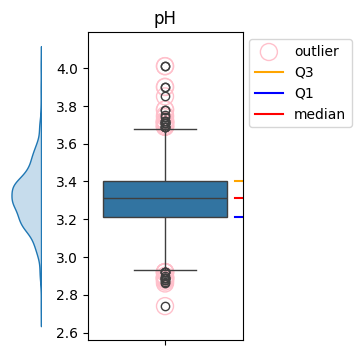

In [ ]:
# 이상치 시각화
import numpy as np
fig, (ax_kde, ax_box) = plt.subplots(1, 2, figsize=(3, 4), gridspec_kw={'width_ratios': [0.2, 1]})

ax_box.scatter(np.zeros_like(outlier[attribute]), outlier[attribute], s=150,  edgecolor='pink', facecolors='none', label='outlier')  # outlier
sns.kdeplot(y=wine_df[attribute], ax=ax_kde, fill=True)
sns.boxplot(wine_df[attribute], ax=ax_box, width=0.8)

common_ylim = (min(ax_kde.get_ylim()[0], ax_box.get_ylim()[0]), max(ax_kde.get_ylim()[1], ax_box.get_ylim()[1]))
ax_kde.set_ylim(common_ylim)
ax_box.set_ylim(common_ylim)

ax_kde.invert_xaxis()
ax_kde.spines['top'].set_visible(False); ax_kde.spines['right'].set_visible(False)
ax_kde.spines['left'].set_visible(False); ax_kde.spines['bottom'].set_visible(False)
ax_kde.set_xticks([]); ax_kde.set_yticks([])
ax_kde.set_xlabel(""); ax_kde.set_ylabel("")
ax_box.set_ylabel("")

ax_box.axhline(Q3, xmin=0.95, color='orange', label='Q3')   # Q3
ax_box.axhline(Q1, xmin=0.95, color='blue', label='Q1')   # Q1
ax_box.axhline(wine_df[attribute].median(), xmin=0.95, color='red', label='median')  # median
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(attribute)
plt.subplots_adjust(wspace=0.5)

plt.show()
# 결론: boxplot 하나로 어느 정도 기울어져 잇는지 확인 가능

이와 같이, 한 변수에 대해서는 boxplot으로 데이터의 형태를 쉽게 알아볼 수 있습니다.

그 외에 여러 변수들 간의 관계에서 나타나는 이상치를 찾으려면 scatter plot을 사용할 수도 있습니다.



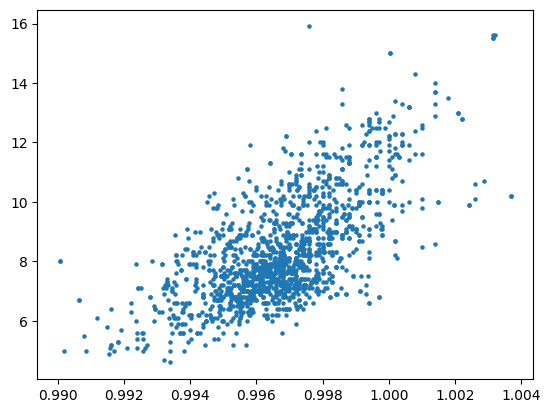

In [ ]:
plt.scatter(x=wine_df['density'], y=wine_df['fixed acidity'], s=5)
plt.show()

## 누락 데이터 처리

지난 실습 때는 누락 데이터를 처리하는 방법으로 pandas의 fillna 메소드를 사용했습니다.

sklearn에서도 이와 같이 누락 데이터를 특정 값으로 채워주는 도구인 **"Imputer"** 라는 것을 제공하는데,\
그것을 직접 사용해보고 단순히 통계값으로 채우는 행위가 어떤 문제를 일으키는지 확인해봅시다.

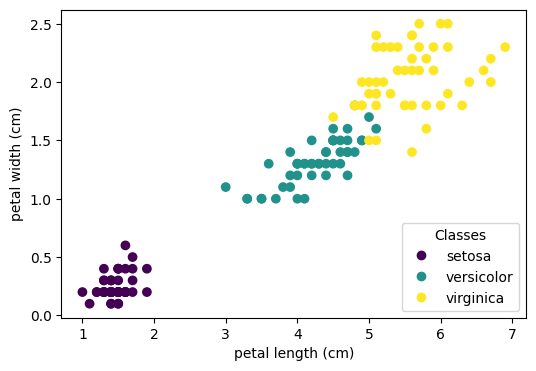

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 데이터셋 준비
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 꽃잎(petal) 크기에 대해 데이터셋 시각화
fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set(xlabel='petal length (cm)', ylabel='petal width (cm)')
ax.legend(scatter.legend_elements()[0], iris.target_names, loc='lower right', title='Classes')
plt.show()

결측치를 단순히 mean이나 median 같은 통계값으로 채우는 것을 Simple Imputation이라고 말합니다.

이런 작업을 sklearn의 SimpleImputer로 수행할 수 있습니다.

SimpleImputer 객체를 만들고 데이터를 학습시켜 결측치를 평균값으로 채워봅시다.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# sklearn의 도구를 사용하기 위해서는 먼저 객체를 만들어줘야 한다
# SimpleImputer 객체를 만들기. 채우는 전략(strategy)를 매개변수로 줘야 한다.
imp_mean = SimpleImputer(strategy="mean") # 평균을 사용하기 위해 mean을 채움

# 기준으로 하는 데이터셋을 제공하여"학습"시키기 (fit 메소드)
imp_mean.fit(X) # X데이터 학습시키기(위에서 만들었던 iris 데이터)

# 결측치 데이터
new_X = np.array([[np.nan, 2.3], [6.5, np.nan], [1.3, np.nan], [np.nan, 0.9]])
new_y = np.array([2, 2, 0, 1])

print("원본 데이터")
print(new_X, '\n')

# 데이터의 결측치를 채우기 (transform 메소드)
filled_X = imp_mean.transform(new_X)    # transform 메소드로 자동으로 채워준다. 결측치를

print("채운 데이터")
print(filled_X)

원본 데이터
[[nan 2.3]
 [6.5 nan]
 [1.3 nan]
 [nan 0.9]] 

채운 데이터
[[3.758      2.3       ]
 [6.5        1.19933333]
 [1.3        1.19933333]
 [3.758      0.9       ]]


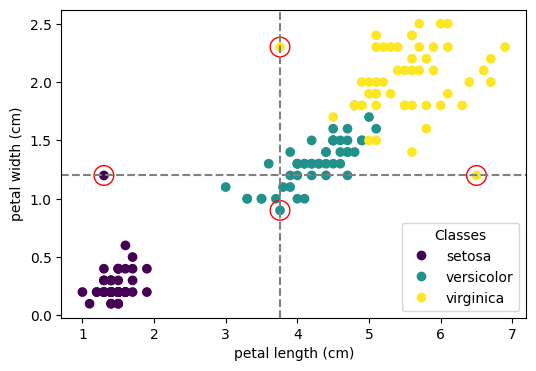

In [ ]:
# 결측치를 채운 데이터셋 시각화 (SimpleImputer) # 빨간색 동그라미가 생긴 것
fig, ax = plt.subplots(figsize=(6, 4))

scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.scatter(filled_X[:, 0], filled_X[:, 1], c=new_y)
ax.scatter(filled_X[:, 0], filled_X[:, 1], edgecolor='red', facecolors='none', s=200)
ax.set(xlabel='petal length (cm)', ylabel='petal width (cm)')
ax.legend(scatter.legend_elements()[0], iris.target_names, loc='lower right', title='Classes')
ax.axvline(X[:, 0].mean(), ls='--', c='gray')
ax.axhline(X[:, 1].mean(), ls='--', c='gray')

plt.show()
# 그러니까 평균값으로 대체값을 넣었기 때문에, 다른 변수와의 관계를 고려하지 않는 것임. 이상치로 값이 튀어버림

위에서 본 것처럼 단순 통계값으로 채우는 행위는 구현이 간단하고 성능이 빠를 수는 있지만,\
다른 변수와의 관계를 고려하지 않는 좋지 않은 방법입니다.

그래서 sklearn에서는 유사한 이웃 데이터를 바탕으로 결측값을 추정해주는 "KNNImputer" (K nearest neighbor)를 제공합니다.



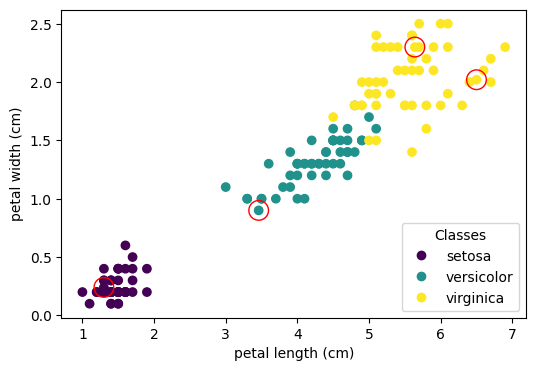

In [ ]:
from sklearn.impute import KNNImputer # k가 의미하는거는 몇 개를 보겠다

# sklearn의 도구이기 때문에 객체를 먼저 생성하고, 학습을 시킨 다음에 transform으로 변환을 해줘야함
# KNNImputer 객체 생성. 몇 개의 이웃을 참고할지(n_neighbors)를 매개변수로 줘야한다.
imputer = KNNImputer(n_neighbors=5, weights='uniform')  # uniform은 공평하게 참고를 하겠다. 전체 다를 참고하겠다

# 학습
imputer.fit(X)

# 추정
knn_X = imputer.transform(new_X)

# 결측치를 채운 데이터셋 시각화 (KNNImputer)
fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
scatter_new = ax.scatter(knn_X[:, 0], knn_X[:, 1], c=new_y)
scatter_new = ax.scatter(knn_X[:, 0], knn_X[:, 1], edgecolor='red', facecolors='none', s=200)
ax.set(xlabel='petal length (cm)', ylabel='petal width (cm)')
ax.legend(scatter.legend_elements()[0], iris.target_names, loc='lower right', title='Classes')
plt.show()
# 빨간색 동그라미가 새롭게 채워진 부분. 정상분포에 튀는 값 없이 잘 분포하는 중

**알아두면 좋은 정보)**

위에서 실습한 예제에는 기준 데이터 X와 결측치 데이터 new_X가 분리돼 있습니다.

만약 사용하고자 하는 데이터셋 내부에 결측치가 포함돼있다면\
fit과 transform을 분리할 필요 없이 fit_transform으로 학습과 변환을 한 번에 수행할 수 있습니다.

In [ ]:
data = pd.DataFrame(np.concatenate((X, new_X)), columns=iris.feature_names[2:4])
print("결측치가 있는 데이터셋")
print(data.tail())

filled_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns) # fit_transform() 메소드를 사용해서 동시에 학습과 변환을 해줌. knn imputer뿐만 아니라 아래에 더 다양하게 있음
print("\n결측치를 채운 데이터셋")
print(filled_data.tail())

결측치가 있는 데이터셋
     petal length (cm)  petal width (cm)
149                5.1               1.8
150                NaN               2.3
151                6.5               NaN
152                1.3               NaN
153                NaN               0.9

결측치를 채운 데이터셋
     petal length (cm)  petal width (cm)
149               5.10              1.80
150               5.76              2.30
151               6.50              2.02
152               1.30              0.24
153               3.46              0.90


## 불균형 데이터 처리

한 쪽으로 치우쳐져 있는 데이터셋은 이상치와 비슷한 이유로 통계 분석과 모델 학습에 좋지 않은 영향을 줍니다.

대표적인 예시로는, 강아지와 고양이를 분류하는 문제에서 만약 고양이 데이터가 훨씬 많다면\
단순히 모든 것을 고양이로 예측하는 모델이 높은 정확도를 갖는다고 평가될 수 있습니다.

그렇기에 개수를 최대한 서로 맞춰주는 것이 중요합니다.


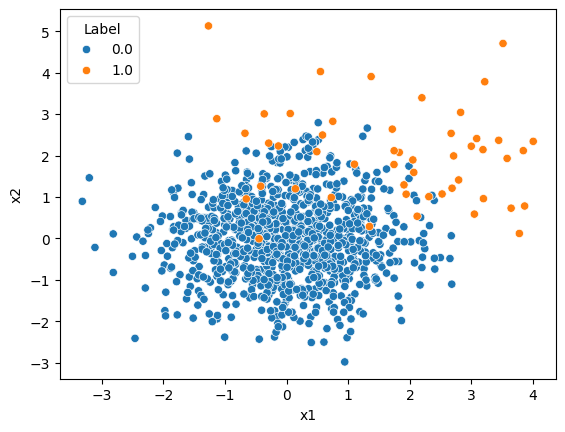

Label
0.0    1000
1.0      50
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)

# 클래스별 샘플 수 설정
n_samples_cat = 1000  # 고양이 데이터
n_samples_dog = 50   # 강아지 데이터

# 임의의 데이터 생성
# 고양이: 평균 0, 표준편차 1
data_cat = np.random.normal(0, 1, (n_samples_cat, 2)) # 넘파이의 정규분포 random.normal
labels_cat = np.zeros(n_samples_cat)

# 강아지: 평균 2, 표준편차 1.5
data_dog = np.random.normal(2, 1.5, (n_samples_dog, 2))
labels_dog = np.ones(n_samples_dog)

# 데이터셋 결합
data_combined = np.vstack((data_cat, data_dog))
labels_combined = np.hstack((labels_cat, labels_dog))

# Pandas DataFrame으로 변환
df = pd.DataFrame(data_combined, columns=['x1', 'x2'])
df['Label'] = labels_combined

fig = plt.figure()
sns.scatterplot(data=df, x='x1', y='x2', hue='Label')
plt.show()

print(df['Label'].value_counts())

대표적인 불균형 데이터 처리 방법인 SMOTE를 실습해 봅시다.

SMOTE는 대표적인 Over sampling 기법 중 하나입니다. Over Sampling은 데이터가 적은 것을 많은 것과 동일하게 만들어주는 기법. 반대로 데이터 많은 것을 줄이는 것을 Under Sampling 이라고 부름

SMOTE의 매개변수인 sampling_strategy를 통해, 어떤 클래스를 대상으로 할 지 설정할 수 있습니다.

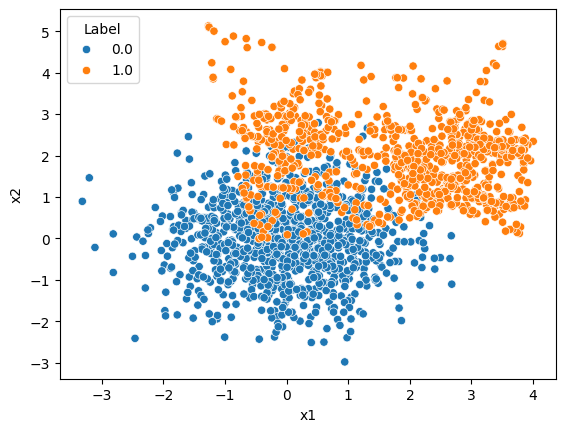

Label
0.0    1000
1.0    1000
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성. 몇 개의 이웃을 참고할지(k_neighbors)를 매개변수로 줘야한다.
smote = SMOTE(sampling_strategy='minority', k_neighbors=15)

# X와 y를 제공해서 "학습과 동시"에 새로운 X, y 생성 (fit_resample 메소드)
X_sm, y_sm = smote.fit_resample(df.drop(columns='Label'), df['Label'])

data_sm = pd.DataFrame(X_sm, columns=['x1', 'x2'])
data_sm['Label'] = y_sm

# 증가된 데이터셋 시각화
fig = plt.figure()
sns.scatterplot(data=data_sm, x='x1', y='x2', hue='Label')
plt.show()

print(data_sm['Label'].value_counts())

## 스케일링

지난 실습 때 정규화를 배우면서 이야기 했듯,
변수가 갖는 범위의 크기는 변수마다 다를 수 있습니다.

이런 경우에는 데이터 분석할 때, 큰 범위를 갖는 변수가 더 큰 영향을 갖게 됩니다.

그래서 보통 모든 변수들이 같은 크기의 범위를 갖도록 스케일링하는 작업을 가집니다.

특히, 0~1 같은 특정 범위로 조정하는 행위를 정규화라고 부릅니다.


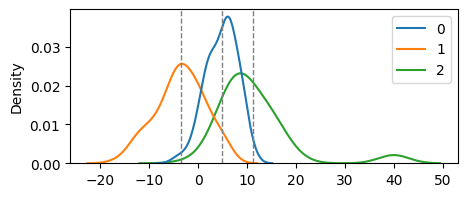

[0]
최소: -4.57	최대: 11.28	평균: 4.84	표준편차: 3.22
[1]
최소: -16.58	최대: 6.05	평균: -3.57	표준편차: 5.00
[2]
최소: -2.56	최대: 40.00	평균: 11.27	표준편차: 7.86


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def info(arr):
  plt.figure(figsize=(5, 2))
  sns.kdeplot(arr)
  for col in range(arr.shape[1]):
    plt.axvline(arr[:, col].mean(), c='gray', ls='--', lw=1)
  plt.show()

  for col in range(arr.shape[1]):
    print(f"[{col}]")
    print(f"최소: {arr[:, col].min():.2f}\t최대: {arr[:, col].max():.2f}\t평균: {arr[:, col].mean():.2f}\t표준편차: {arr[:, col].std():.2f}")


np.random.seed(20)
original = np.column_stack((np.random.normal(5, 3, 100), np.random.normal(-4, 5, 100), np.random.normal(10, 5, 100)))
original[0:5, 2] = 40

info(original)

[11.28399601 16.57677138 40.        ]


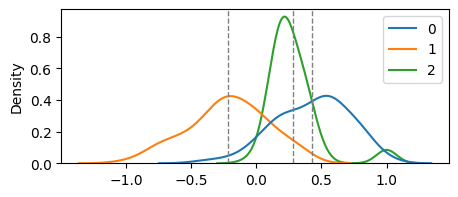

[0]
최소: -0.40	최대: 1.00	평균: 0.43	표준편차: 0.29
[1]
최소: -1.00	최대: 0.36	평균: -0.22	표준편차: 0.30
[2]
최소: -0.06	최대: 1.00	평균: 0.28	표준편차: 0.20


In [ ]:
from sklearn.preprocessing import MaxAbsScaler # MaxAbsScaler는 각각의 변수에 대해서 최대 절댓값을 계산 후에, 그 값을 각각의 변수에 나눠서 -1~1까지의 범위로 맞춰주는 역할

abs_scaler = MaxAbsScaler()

scaled_1 = abs_scaler.fit_transform(original) # 애도 마찬가지로 fit(학습)과 transform(변환)을 해줘야 하기 때문에 fit_transform()으로 동시에 해주었음

print(abs_scaler.max_abs_) # 이게 []안에 있는 각각의 변수가 갖는 최대 절댓값임
# 즉 파란색은 11.283으로 나눠지고, 주황색은 16.5로 나누어지고, 초록색은 40으로 나눠짐

info(scaled_1)

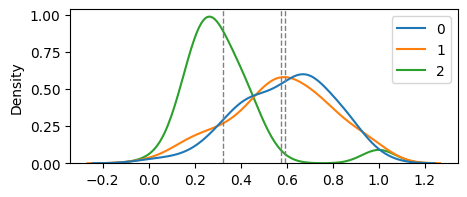

[0]
최소: 0.00	최대: 1.00	평균: 0.59	표준편차: 0.20
[1]
최소: 0.00	최대: 1.00	평균: 0.58	표준편차: 0.22
[2]
최소: 0.00	최대: 1.00	평균: 0.32	표준편차: 0.18


In [ ]:
from sklearn.preprocessing import MinMaxScaler # 최솟값과 최댓값을 0과 1로 맞춰주는 스케일링 기법. 근데 애랑 위에 MaxAbsScaler가 둘다 이상치에 취약함
# 초록색이 왼쪽에 위치해있으니까
minmax_scaler = MinMaxScaler()

scaled_2 = minmax_scaler.fit_transform(original)

info(scaled_2)

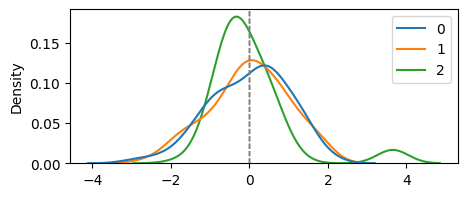

[0]
최소: -2.92	최대: 2.00	평균: 0.00	표준편차: 1.00
[1]
최소: -2.60	최대: 1.92	평균: 0.00	표준편차: 1.00
[2]
최소: -1.76	최대: 3.65	평균: 0.00	표준편차: 1.00


In [ ]:
from sklearn.preprocessing import StandardScaler # 얘가 정규분포로 잘 따르겠끔 만들어줌
# 평균이 0이고 표준편차가 1인분포가 정규분포
# 근데 알다시피 평균이 이상치에 굉장히 민감하기 때문에 이 기법도 이상치에 민감함
std_scaler = StandardScaler()

scaled_3 = std_scaler.fit_transform(original)

info(scaled_3)

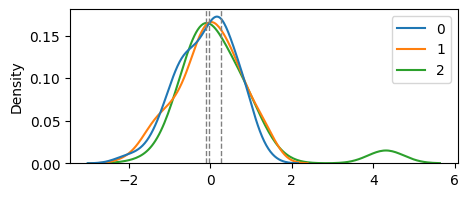

[0]
최소: -2.17	최대: 1.31	평균: -0.11	표준편차: 0.70
[1]
최소: -2.03	최대: 1.46	평균: -0.02	표준편차: 0.77
[2]
최소: -1.67	최대: 4.31	평균: 0.27	표준편차: 1.11


In [ ]:
from sklearn.preprocessing import RobustScaler # IQR(4분위 값)을 이용하여 조정을 해주는 스케일러
# 이상치에 민감하지 않은 이상적인 스케일러
# 하위 25% 하위 50%, 하위 75%, 하위 100% 이런 4분위 값을 이용한 스케일러 방식이기 때문에, 중앙값을 사용하기 때문에 이상치에 덜 민감해졌음
robust_scaler = RobustScaler()

scaled_4 = robust_scaler.fit_transform(original)

info(scaled_4)

## 인코딩

변수가 갖는 타입또한 다를 수 있기 때문에 컴퓨터가 인식할 수 있는 숫자 형태로 변환하는 것이 중요합니다.

범주형 변수가 이런 경우에 해당하는데, 순서를 갖는 ordinal과 갖지 않는 nominal 데이터는 처리 방식이 서로 다릅니다.


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(12)
species_data = np.random.choice(["cat", "dog", "bird"], 10) # nominal 변수
healthy_data = np.random.choice(["very bad", "bad", "normal", "good", "very good"], 10) # ordianl 변수

animal_data = pd.DataFrame({
    'species': species_data,
    'healthy': healthy_data
})

animal_data.head(5)

,species,healthy
0,bird,bad
1,dog,normal
2,dog,good
3,bird,normal
4,cat,very bad


In [ ]:
from sklearn.preprocessing import OneHotEncoder # 순서가 없는 변수를 인코딩 해줌(species). nominal 변수를 분리를 해줌. 0 또는 1로 나타내주는 인코딩 방법

oh_encoder = OneHotEncoder(sparse_output=False) # 객체 만들고, spares_output = false 는 옵션인데, 디폴트값

encoded_1 = oh_encoder.fit_transform(animal_data[['species']]) # fit_transform으로 species 열을 학습시킴, 괄호가 2개인 이유는 괄호 1개면
# speices에 해당하는 시리즈만 가져오기 때문에 반드시 리스트로 만들어줘야함, 2개 이상의 컬럼도 인코딩 할 수 있기 때문에, 1개이면 시리즈를 반환함

print(encoded_1)

species_col = oh_encoder.get_feature_names_out() # 위에서 만들었던 인코더에다가 get_featur_names_out() 메소드로 새로 만들 수 있는 열 이름을 얻을 수 있음
print(species_col) # 새로운 변수 이름이 나옴

temp_df = pd.DataFrame(encoded_1, columns=species_col)

new_animal_data = pd.concat([animal_data.drop(columns='species'), temp_df], axis=1) # 새롭게 만든 데이터프레임을 원본 데이터프레임에다가 추가
 # 대신 species 열은 제거 후에 , 새롭게 인코딩 된 데이터를 추가

new_animal_data.head(5)
# 1.0 이면 cat 입니까? 네!, 0.0이면 bird 입니까? 아니요 임


[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
['species_bird' 'species_cat' 'species_dog']


,healthy,species_bird,species_cat,species_dog
0,bad,1.0,0.0,0.0
1,normal,0.0,0.0,1.0
2,good,0.0,0.0,1.0
3,normal,1.0,0.0,0.0
4,very bad,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder # 순서가 있는 ordinal 변수를 인코딩해줌(healthy)

ord_encoder = OrdinalEncoder(categories=[['very bad', 'bad', 'normal', 'good', 'very good']])
# 근데 컴퓨터는 어떤 순서인지 모르니까 categories로 순서를 우리가 정해줌(이때도 대괄호 2개 사용)

encoded_2 = ord_encoder.fit_transform(animal_data[['healthy']]) # fit_transform() 사용 및 대괄호 2개 사용

print(encoded_2) # 총 5개니까 0~4까지의 값으로 나오게 됨

new_animal_data['healthy'] = encoded_2 # 새로 만든 거를 원본 healthy에다가 넣어줌

new_animal_data.head(5) # very bad부터 0이니까 원래 데이터에서 normal은 3으로 처리 되는거지

[[1.]
 [2.]
 [3.]
 [2.]
 [0.]
 [0.]
 [4.]
 [2.]
 [1.]
 [3.]]


,healthy,species_bird,species_cat,species_dog
0,1.0,1.0,0.0,0.0
1,2.0,0.0,0.0,1.0
2,3.0,0.0,0.0,1.0
3,2.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


## 특징 선택

데이터를 분석할 때, 원하는 특징만 선택하여 진행하고 싶을 때도 있습니다.

분석의 목적이 되는 target 변수를 지정했을 때, target과 가장 관련이 높은 특징들을 선택할 때 사용하는 방법 중 하나를 소개하겠습니다.

In [ ]:
import pandas as pd
import numpy as np

# 와인 품질 데이터셋 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, delimiter=";")   # 세미콜론으로 구분된 데이터셋에 대한 처리

wine_df.corr() # pandas의 메소드 중 corr() 메소드 사용하면 상관관계 계산 후 테이블 형태

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


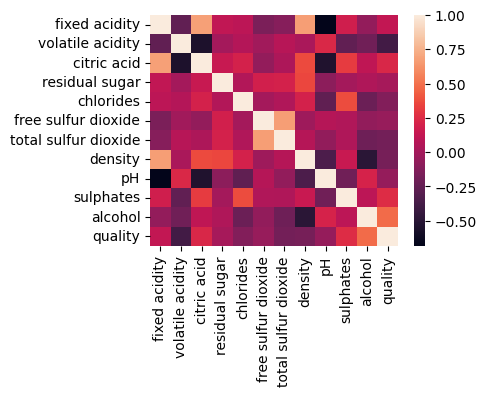

In [ ]:
corr = wine_df.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr) # seaborn의 heatmap로 시각화를 이쁘게
plt.show()

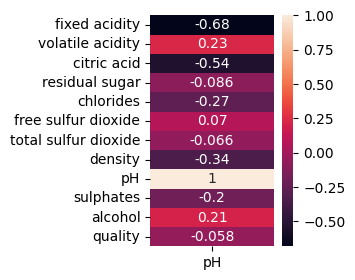

In [ ]:
plt.figure(figsize=(2, 3))
sns.heatmap(corr[['pH']], annot=True) # corr()에서 특정 변수만 딱 뽑아서 이것만 heatmap으로 나타내기(annot = True 옵션은 수치값으로 나타내는거 )
plt.show()

## 실습 종료 전 유의사항

※ 완료 시 우측 상단 프로필 옆 '**공유 - 액세스를 *링크가 있는 모든 사용자*로 전환**' 후 복사한 링크를 이루리 과제 란에 업로드 하세요.

<img src="https://drive.google.com/uc?id=1Zj1FKIz0sanqUfkfr3scp5M-dDgMFxYQ" height=300>

</br>

※ 추가로 상단 메뉴 '**파일 - 다운로드 - .ipynb**' 로 다운로드 후 첨부 파일로 업로드 하세요.

※ 즉, 과제의 텍스트란에는 링크를, 파일 첨부란에는 .ipynb 파일을 제출하십시오.